<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/MAT422_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import re
import random
import pandas
from IPython.display import display, Latex
from sympy import *
from collections import Counter
from scipy.stats import poisson
from scipy.integrate import quad


#2.21 Probability Axioms

The sample space of an expiriment, denoted by $S$, is the set of all possible outcomes in an expiriment. An event is a collections of outcomes contained in $S$. A simple event consists of one outcome, and a compound event consists of more than one outocome.

So given and expiriment and a sample space $S$, the probability distribution function (pdf) assigns to each event $A$ an number $P(A)$, "the probability of A." This assignment shoud satisfy the following axioms:


*   For any event $A$, $1\leq P(A) \leq 0$
*   $P(S)=1$
*   If $A_1, A_2,A_3, \dots$ is an infinite collection of disjoint events, then
\begin{equation}
P(A_1\cup A_2\cup A_3\cup\dots)=\sum_{i=1}^\infty P(A_i)
\end{equation}
* For any event $A$, $P(A) +P(A') = 1$
* When events $A$ and $B$ are mutually exclusive, $P(A\cup B)=P(A)+P(B)$
* For any two events $A$ and $B$, $P(A\cup B)=P(A)+P(B)-P(A\cap B)$
$$
$$

Let's come up with an example! Say $S:=[0,1]\in \mathbb{R}, \ A⊂[a,b]\in[0,1], \ \text{and}\ P(A) = b-a.$

In other words, our sample space is the real numbers between zero and 1 (inclusive), and our probability distribution function is the length of the segment $A$.

* We can immideately see our first two axioms are met.
* Since our pdf is a distance, we can always add out segments
* The compliment of $A$ is either open or closed such that $A\cup A' = [0,1]$, so the $P([0,1])=1-0=1$.
* If $A\cap B \neq \emptyset$, the our pdf would count the areas of overlaps as it's own probability, so $P(A\cup B)=P(A)+P(B)-P(A\cap B)$. Otherwise, if $A\cap B = \emptyset$ then $P(A\cup B)=P(A)+P(B)$

Our example checks out!

# 2.2.2 Conditional Probability

For any two events, $A$ and $B$ with $P(B)>0$, the condiitonal probability of $A$ given that $B$ has occured is defined by
\begin{equation}
P(A | B) = \frac{P(A\cap B)}{P(B)}\ \rightarrow \ P(A\cap B) = P(A|B)\cdot P(B)
\end{equation}
Consider roling a fair die.

Let's find the probability of rolling a 3, after rolling an odd number.
\begin{equation}
P(3|\text{odd}) = \frac{P(3\cap \{1,3,5\})}{P(\{1,3,5\})}=\frac{P(3)}{3/6}=\frac{1}{3}
\end{equation}

Let's run some simulations!

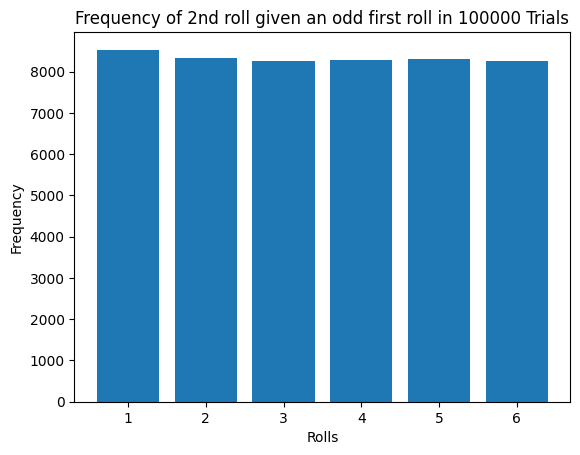

Proportion of rolling a 3 given 100000 trails: 0.16634
Proportion of rolling a an odd first:  0.49994
Proportion of rolling a 3 given a first odd roll given 100000 trails: 0.33271992639116693
Notice it approaches 1/3!


In [4]:
# Function to roll the die twice for a given number of trials
def roll_die_twice(trials):
  first_rolls = [random.randint(1, 6) for _ in range(trials)]
  second_rolls = [random.randint(1, 6) for _ in range(trials)]
  return first_rolls, second_rolls

# Function to count the number of odd first rolls and return the frequency of each of the second rolls
def odd_first_rolls(first_rolls, second_rolls):

  odd_first = {1: 0, 2:0, 3: 0, 4:0, 5: 0, 6:0} #generate frequency list
  for first, second in zip(first_rolls, second_rolls): #iterate pairwise over the rolls
    if first % 2 != 0:
      odd_first[second] += 1
  return odd_first

def numrolled(first_rolls, second_rolls, num):
  count =0
  for first, second in zip(first_rolls, second_rolls): #iterate pairwise over the rolls
    if(first == num and second == num): count+=2
    elif(first == num or second == num): count+=1
  return count
# Run simulation
trails =100000
first_rolls, second_rolls = roll_die_twice(trails)

second_given_odd_first = odd_first_rolls(first_rolls, second_rolls)

# Create bar chart of odd first rolls and their frequency
plt.bar(second_given_odd_first.keys(), second_given_odd_first.values())
plt.xlabel('Rolls')
plt.ylabel('Frequency')
plt.title('Frequency of 2nd roll given an odd first roll in '+str(trails)+' Trials')
plt.show()

# Output the total number of times 3 was rolled given an odd first roll
totalodd = 0

for i in range(6): totalodd+=second_given_odd_first[i+1]
Ptotalodd = totalodd/trails
Pthree = numrolled(first_rolls, second_rolls, 3)/(2*trails)
print("Proportion of rolling a 3 given "+str(trails)+" trails: "+str(Pthree))
print("Proportion of rolling a an odd first:  "+str(Ptotalodd))
print("Proportion of rolling a 3 given a first odd roll given "+str(trails)+" trails: "+str(Pthree/Ptotalodd))
print("Notice it approaches 1/3!")


#2.2.3 Discrete Random Variables

If the possible outcome of a random variable is countable number of distinct values such as $1,2,3,\dots$, then it is a Discrete Random variable.

The Poison distribution is one of the a discrete probability distribution that describes the probability of a given number of events occurring in
a fixed interval of time or space if these events occur with a known constant
mean rate and independently of the time since the last event. It's PMF is given by
\begin{equation}
P(x=r)=\frac{\lambda^re^{-\lambda}}{r!}
\end{equation}
Where $P(x=r)$ is the probability of an event occurring r number of times, r is the number of occurrences of the event, and $\lambda^r$ represents the average/expected number of occurrences of that event.
Let's explore it using python!

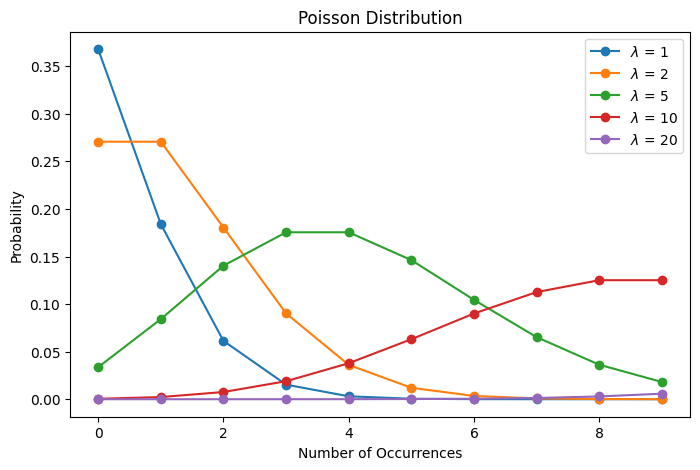

In [73]:
#Generating distributions
lambdas = [1, 2, 5, 10, 20]
x = [[poisson.pmf(j, l) for j in range(1,11)] for l in lambdas]

fig1 = plt.figure(figsize=(8, 5))
for i in x:
  plt.plot(i, '-o')
plt.title('Poisson Distribution')
plt.xlabel('Number of Occurrences')
plt.ylabel('Probability')
plt.legend(['$\lambda$ = 1', '$\lambda$ = 2', '$\lambda$ = 5', '$\lambda$ = 10', '$\lambda$ = 20'])

Here we can see the relationships between number of occurences, and their probability, with respect to certain distributions with varrying numbers of lambda.

For the Poisson distribution, $E(X)=V(X)=\lambda$

#2.2.4 Continuous Random Variables
A random variable $X$ is continuous if possible values comprise either a single
interval on the number line or a union of disjoint intervals.

Stuff that would be a continuous random variable would include: height, weight, income, etc.

In ths example, we will look at SAT Scores of a 1500 students.

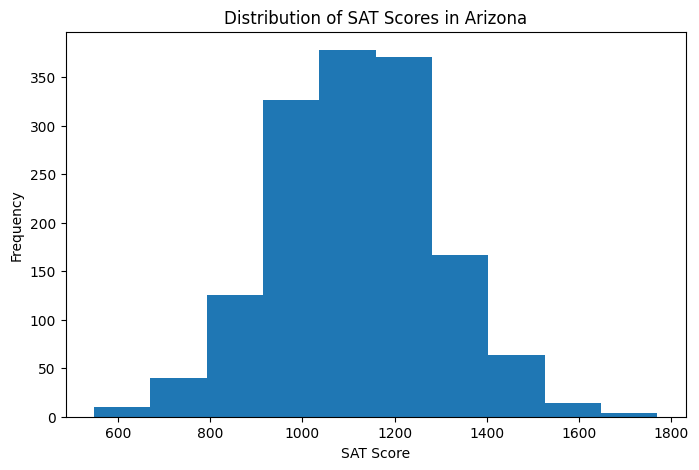

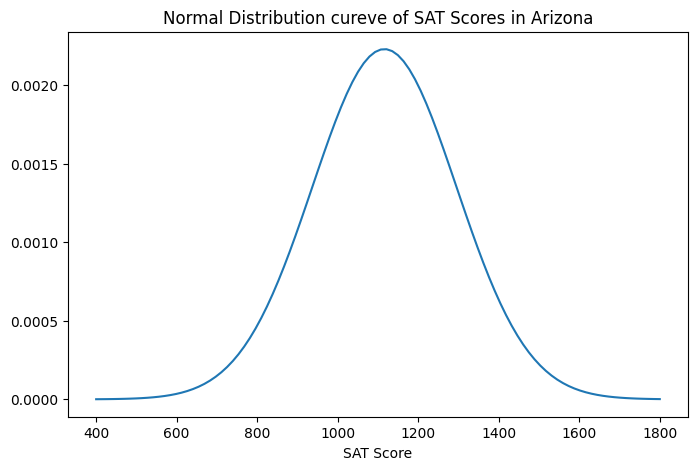

In [27]:
'''
In Arizona the mean SAT score was 1116, with a standar deviation of 179, in 2017
We are using the numpy random normal function to generate 1500 SAT scores.
'''

SATscores = np.random.normal(1116, 179, 1500)

# Define the SAT normal curve
def SATnorm(x):
    return (1 / (np.sqrt(2 * np.pi) * 179)) * np.exp(-(x - 1116) ** 2 / (2 * 179 ** 2))

xx = np.linspace(400, 1800, 100)
yy = SATnorm(xx)


fig1 = plt.figure(figsize=(8, 5))
plt.hist(SATscores)
plt.title('Distribution of SAT Scores in Arizona')
plt.xlabel('SAT Score')
plt.ylabel('Frequency')
plt.show()

fig2 = plt.figure(figsize=(8, 5))
plt.plot(xx,yy)
plt.title('Normal Distribution cureve of SAT Scores in Arizona')
plt.xlabel('SAT Score')
plt.show()

Let's see the probability of scoring greater than 1400.

Recall: $P(X>1400)= 1 - P(X\leq 1400)$

In [32]:
integral, error = quad(SATnorm, 0, 1400)
print("P(X<=1400)="+str(integral))
print('error: '+str(error))

print("So our probability of scoring more than 1400 is:")
print(str(1-integral))

P(X<=1400)=0.9436974797858512
error: 9.082635359959623e-14
So our probability of scoring more than 1400 is:
0.05630252021414883
